In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [3]:
ecb=pd.read_csv('/Users/alexandrabessarabova/code/bess92/Deciphering_Central_Banks/raw_data/all_ECB_speeches.csv',delimiter='|')
ecb.drop(columns=['subtitle'],inplace=True)

In [47]:
fed=pd.read_csv('/Users/alexandrabessarabova/code/bess92/Deciphering_Central_Banks/raw_data/all_fed_speeches.csv')
fed.drop(columns=['link','event','year','text_len','location'],inplace=True)

In [42]:
ecb.head()
ecb.columns

Index(['date', 'speakers', 'title', 'contents', 'clean_text'], dtype='object')

In [48]:
fed['date']=pd.to_datetime(fed.date,format='%Y%m%d')
fed.head()


,title,speaker,text,date
0,Supervision of bank risk-taking,Vice Chair Alice M. Rivlin,I discovered when I joined the Board of Govern...,1996-12-19
1,Social security,Chairman Alan Greenspan,I am privileged to accept the Union League of...,1996-12-06
2,The challenge of central banking in a democrat...,Chairman Alan Greenspan,The Challenge of Central Banking in a Democrat...,1996-12-05
3,Clearinghouses and risk management,"Governor Edward W. Kelley, Jr.",It is a pleasure to be with you this morning ...,1996-12-03
4,Supervisory and regulatory responses to financ...,Governor Susan M. Phillips,Supervisory and Regulatory Responses to Financ...,1996-11-25


In [5]:
ecb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2815 non-null   object
 1   speakers  2811 non-null   object
 2   title     2815 non-null   object
 3   subtitle  2814 non-null   object
 4   contents  2713 non-null   object
dtypes: object(5)
memory usage: 110.1+ KB


In [6]:
ecb=ecb.dropna()

In [7]:
ecb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2713 entries, 0 to 2814
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      2713 non-null   object
 1   speakers  2713 non-null   object
 2   title     2713 non-null   object
 3   subtitle  2713 non-null   object
 4   contents  2713 non-null   object
dtypes: object(5)
memory usage: 127.2+ KB


In [8]:
ecb=ecb[~ecb['contents'].str.contains(" der ")]
ecb=ecb[~ecb['contents'].str.contains(" la ")].reset_index(drop=True)

In [9]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

In [10]:
def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    cleaned = ' '.join(lemmatized) # Join back to a string
    return cleaned


In [11]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandrabessarabova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
ecb['clean_text'] = ecb.contents.apply(clean)

In [49]:
ecb.head()

,date,speakers,title,contents,clean_text
0,2024-08-30,Isabel Schnabel,The euro area inflation outlook: a scenario an...,SPEECH The euro area inflation outlook: a s...,speech euro area inflation outlook scenario an...
1,2024-08-24,Philip R. Lane,The effectiveness and transmission of monetary...,SPEECH The effectiveness and transmission o...,speech effectiveness transmission monetary pol...
2,2024-07-23,Philip R. Lane,Opening remarks,SPEECH Opening remarks Welcome address by...,speech opening remark welcome address philip r...
3,2024-07-01,Christine Lagarde,Monetary policy in an unusual cycle: the risks...,SPEECH Monetary policy in an unusual cycle:...,speech monetary policy unusual cycle risk path...
4,2024-06-26,Philip R. Lane,Modern monetary analysis,SPEECH Modern monetary analysis Speech b...,speech modern monetary analysis speech philip ...


In [14]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(ecb['clean_text'])

lda_model = LatentDirichletAllocation(n_components=3)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [15]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [16]:
print_topics(lda_model, vectorizer)

Topic 0:
[('financial', 30891.013377005896), ('bank', 21880.679902487704), ('market', 19051.640162061085), ('risk', 15296.081662262466), ('crisis', 10288.091481857811), ('policy', 9216.16274505309), ('banking', 7564.081613266917), ('liquidity', 7068.146184557434), ('system', 6900.515549984676), ('area', 6607.9101381993505)]
Topic 1:
[('policy', 33670.03465001874), ('monetary', 26329.45712362411), ('rate', 21444.662198032813), ('inflation', 21245.76254681885), ('price', 19247.09526053878), ('euro', 17263.72549742482), ('area', 17235.329507745933), ('growth', 13310.305633272732), ('economic', 13048.343945432453), ('term', 12225.309334068888)]
Topic 2:
[('euro', 22675.311593215643), ('european', 15949.212178551516), ('market', 12679.167976950936), ('bank', 12080.696897945183), ('area', 11808.760354053858), ('ecb', 9551.679422061037), ('country', 9499.151310850859), ('also', 8508.238618942269), ('central', 8387.404588825993), ('financial', 7868.452310458821)]


In [17]:
lda_vectors = lda_model.transform(vectorizer.transform(ecb['clean_text']))

In [18]:
topics=pd.DataFrame({'topic':[np.argmax(i) for i in lda_vectors]})

In [19]:
ecb_topics=pd.concat([ecb,topics],axis=1)

In [20]:
ecb_topics[ecb_topics.topic==0]

,date,speakers,title,subtitle,contents,clean_text,topic
26,2024-03-14,Isabel Schnabel,The Eurosystem’s operational framework,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH The Eurosystem’s operational framewo...,speech eurosystem operational framework speech...,0
32,2024-02-12,Philip R. Lane,Euro area international financial flows: analy...,"Keynote speech by Philip R. Lane, Member of th...",SPEECH Euro area international financial fl...,speech euro area international financial flow ...,0
37,2023-12-07,Frank Elderson,"Powers, ability and willingness to act – the m...","Speech by Frank Elderson, Member of the Execut...","SPEECH Powers, ability and willingness to a...",speech power ability willingness act mainstay ...,0
39,2023-11-30,Christine Lagarde,Welcome address at the fifth ECB Forum on Bank...,"Speech by Christine Lagarde, President of the ...",SPEECH Welcome address at the fifth ECB For...,speech welcome address fifth ecb forum banking...,0
44,2023-11-16,Christine Lagarde,The ESRB’s first general warning one year on,"Welcome remarks by Christine Lagarde, Presiden...",SPEECH The ESRB’s first general warning one...,speech esrb first general warning one year wel...,0
...,...,...,...,...,...,...,...
2241,1999-06-03,Willem F. Duisenberg,Developments in the Financial Sector in Europe...,"Speech by Dr. Willem F. Duisenberg, President ...",Developments in the Financial Sector in Euro...,development financial sector europe following ...,0
2269,1999-01-25,Sirkka Hämäläinen,Finnish savers and investors in the euro area,"Speech presented by Ms Sirkka Hämäläinen, Memb...",Finnish savers and investors in the euro are...,finnish saver investor euro area speech presen...,0
2290,1998-11-06,Tommaso Padoa-Schioppa,The housing finance markets and EMU,Speech delivered by Dr. Tommaso Padoa-Schioppa...,The housing finance markets and EMU Speech...,housing finance market emu speech delivered dr...,0
2302,1998-07-02,Otmar Issing,"Crisis prevention: IMF surveillance, need for ...",Statement by Professor Otmar Issing Member of ...,"Crisis prevention: IMF surveillance, need fo...",crisis prevention imf surveillance need new te...,0


In [21]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

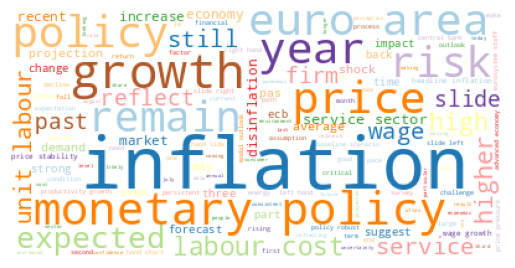

In [22]:
wc = WordCloud(background_color = 'white', contour_width = 2,
     contour_color = 'white', colormap = 'Paired').generate(ecb_topics['clean_text'][0])
plt.axis("off")
plt.imshow(wc)

In [23]:
ecb_topics['date']=pd.to_datetime(ecb_topics.date)

In [24]:
years=[*range(2006,2025)]

In [25]:
years

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

2006


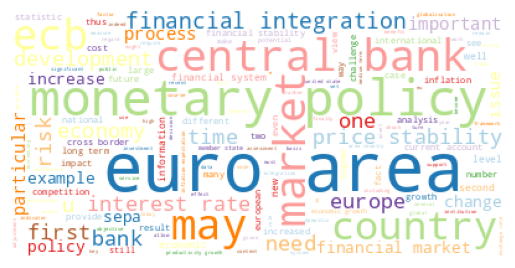

2007


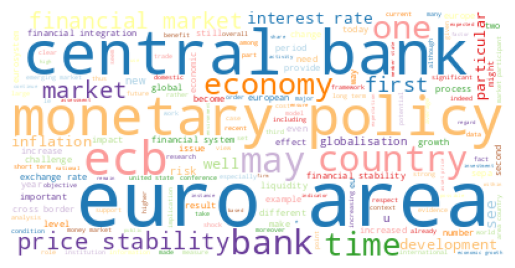

2008


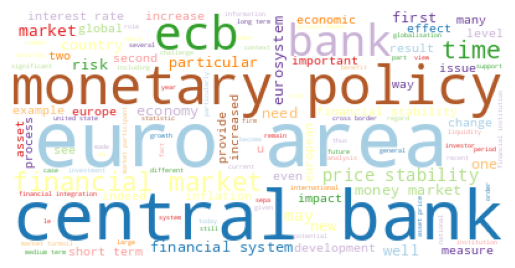

2009


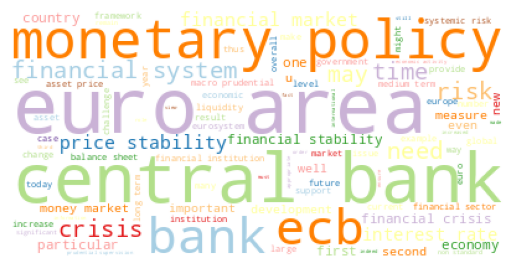

2010


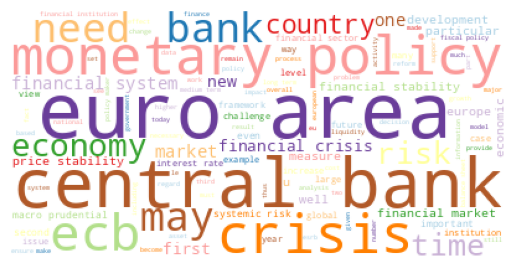

2011


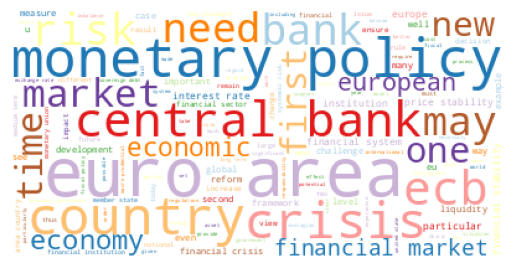

2012


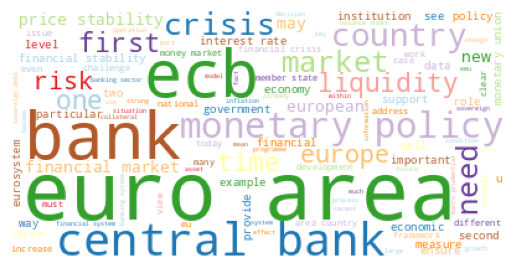

2013


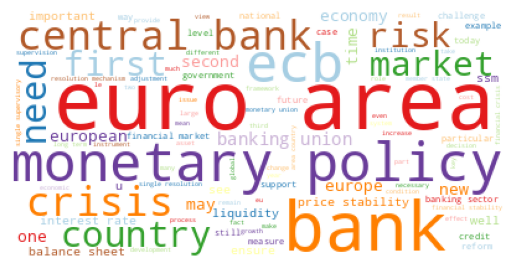

2014


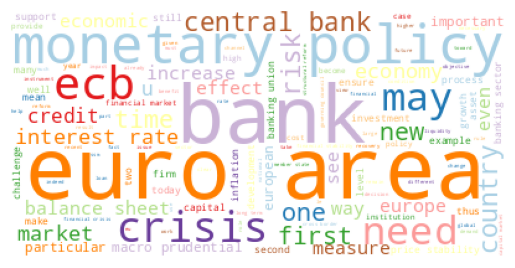

2015


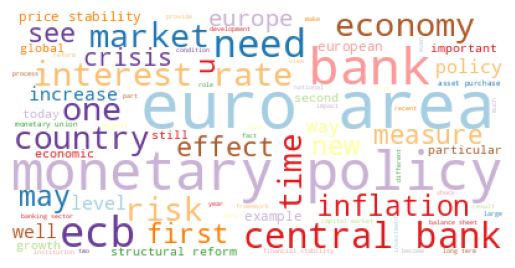

2016


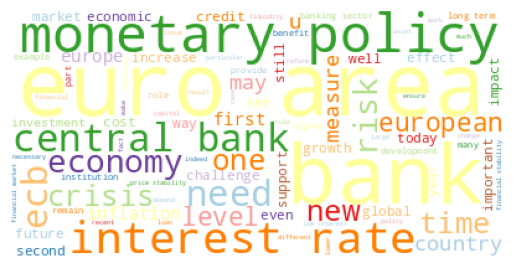

2017


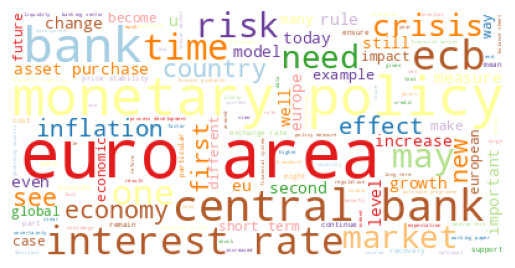

2018


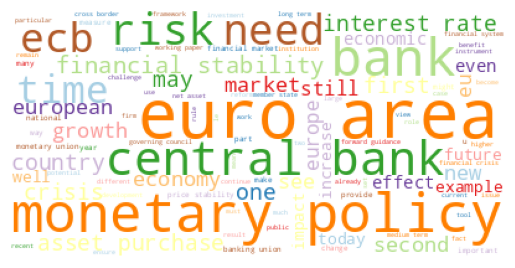

2019


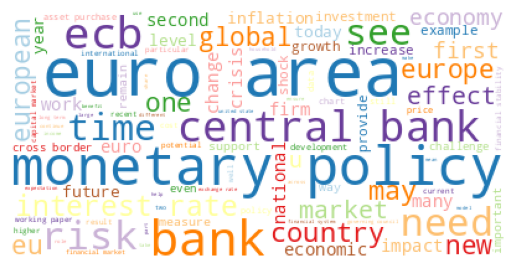

2020


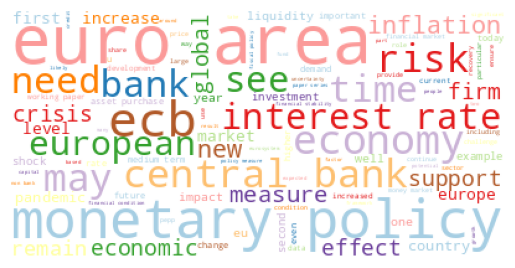

2021


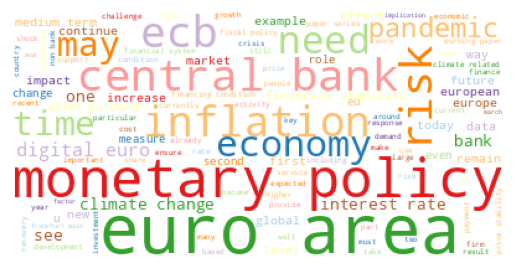

2022


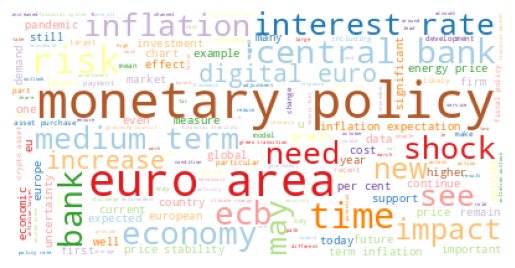

2023


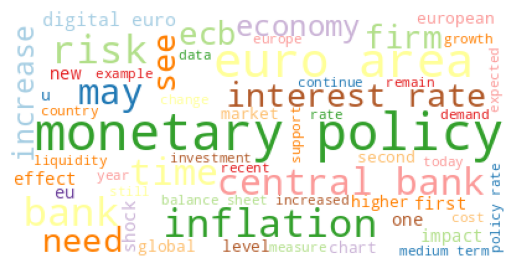

2024


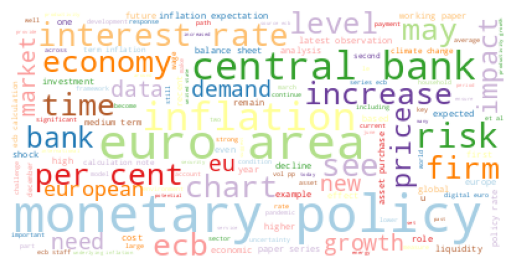

In [35]:
for i in years:
    df=ecb_topics[ecb_topics.date.dt.year==i]
    str=' '
    for k in range(len(df)):
        str=str+df['clean_text'].iloc[k]
    wc = WordCloud(background_color = 'white', contour_width = 2,
    contour_color = 'white', colormap = 'Paired').generate(str)
    print(i)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

# str=' '
# # ecb_topics.clean_text[0]
# print(str+ecb_topics.clean_text[0])
# df=ecb_topics[ecb_topics.date.dt.year==2020]
# df

In [31]:
df['clean_text'].iloc[0]

'speech keeping cyber risk bay individual joint responsibility introductory remark fabio panetta member executive board ecb fifth meeting euro cyber resilience board pan european financial infrastructure frankfurt main december last meeting euro cyber resilience board pan european financial infrastructure ecrb room ecb premise frankfurt main february launched cyber information intelligence sharing initiative ciisi eu already knew critical step addressing cyber threat know timely shortly meeting first wave coronavirus covid pandemic led strict containment measure across europe upcoming vaccine roll out light end tunnel mobility restriction likely remain place time restriction confronted u unparalleled challenge personal professional life response world taken giant leap forward term digitalisation public health situation finally improves go back old normal working home become norm many u adjusted way life certainly enjoy regaining ability move interact freely also learn lesson pandemic s